In [139]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [140]:
city_data = pd.read_csv('Resources/city_data.csv')
ride_data = pd.read_csv('Resources/ride_data.csv')

In [141]:
merged_data = pd.merge( ride_data, city_data, on='city')

In [146]:
city_data_df = city_data.set_index(['city'])

In [143]:
average_fare = merged_data.groupby('city')['fare'].mean()
total_rides = merged_data.city.value_counts()
total_drivers = city_data.set_index('city').driver_count
city_type = city_data.set_index('city').type
pyber_df = pd.concat((city_data_df, average_fare),axis=1 , join='inner')
pyber_df = pd.concat((pyber_df, total_rides),axis=1, join='inner')
pyber_df.columns = ['driver_count','city_type','average_fare', 'total_rides']
pyber_df.head()

,driver_count,city_type,average_fare,total_rides
Kelseyland,63,Urban,21.806429,28
Nguyenbury,8,Urban,25.899615,26
East Douglas,12,Urban,26.169091,22
West Dawnfurt,34,Urban,22.330345,29
Rodriguezburgh,52,Urban,21.332609,23


In [144]:
urban_plot = pyber_df[pyber_df['city_type']=='Urban']
suburban_plot =pyber_df[pyber_df['city_type']=='Suburban']
rural_plot = pyber_df[pyber_df['city_type']=='Rural']


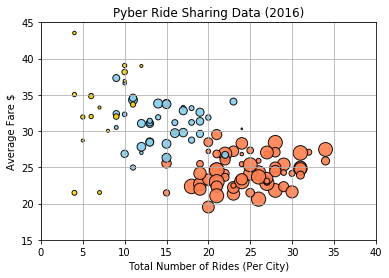

In [145]:
plt.scatter( x = urban_plot.total_rides , y = urban_plot.average_fare, s=urban_plot.driver_count*3, c = 'coral',alpha=.9,linewidth = 1,edgecolor = 'black')
plt.scatter( x = suburban_plot.total_rides , y = suburban_plot.average_fare, s=suburban_plot.driver_count*3, c = 'skyblue',alpha=.9,linewidth = 1,edgecolor = 'black')
plt.scatter( x = rural_plot.total_rides , y = rural_plot.average_fare, s=rural_plot.driver_count*3, c = 'gold',alpha =.9,linewidth = 1,edgecolor = 'black')
plt.title("Pyber Ride Sharing Data (2016)")
plt.ylabel("Average Fare $")
plt.xlabel("Total Number of Rides (Per City)")

plt.xlim([0, 40])
plt.ylim([15, 45])
plt.grid(True)
plt.show()

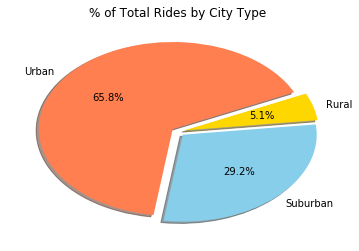

In [178]:
urb = urban_plot.total_rides.sum()
sub = suburban_plot.total_rides.sum()
rur = rural_plot.total_rides.sum()
city_types = ['Urban' , 'Suburban', 'Rural']
totals = [urb,sub, rur]
colors = ['coral', 'skyblue', 'gold']
explode = [.05,.05,.05]
plt.pie(totals,explode=explode, labels = city_types, colors = colors,shadow = True, startangle=25, autopct ='%1.1f%%')
plt.title('% of Total Rides by City Type')
plt.show()

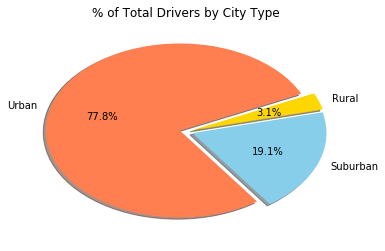

In [181]:
urb = urban_plot.driver_count.sum()
sub = suburban_plot.driver_count.sum()
rur = rural_plot.driver_count.sum()
city_types = ['Urban' , 'Suburban', 'Rural']
totals = [urb,sub, rur]
colors = ['coral', 'skyblue', 'gold']
explode = [.05,.05,.05]
plt.pie(totals,explode=explode, labels = city_types, colors = colors,shadow = True, startangle=25, autopct ='%1.1f%%')
plt.title('% of Total Drivers by City Type')
plt.show()

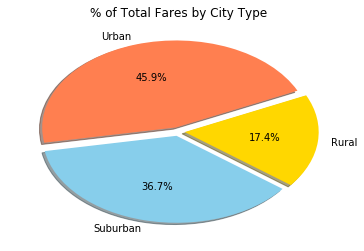

In [182]:
urb = urban_plot.average_fare.sum()
sub = suburban_plot.average_fare.sum()
rur = rural_plot.average_fare.sum()
city_types = ['Urban' , 'Suburban', 'Rural']
totals = [urb,sub, rur]
colors = ['coral', 'skyblue', 'gold']
explode = [.05,.05,.05]
plt.pie(totals,explode=explode, labels = city_types, colors = colors,shadow = True, startangle=25, autopct ='%1.1f%%')
plt.title('% of Total Fares by City Type')
plt.show()